# 수업 소스

--  Andrew Ng's ML class
- https://calss.coursera,org/ml-003/lecture
- http://www.holehouse.org/mlclass/(note)

-- Convolutional Neural Networks for Visual Recognition
- http://cs34ln.github.io/

-- Tensorflow
- https://www.tensorflow.org
- https://github.com/aymericdamien/TensorFlow-Examples

# ML lec 01


#### 프로그래밍을 하려면 많은 rule들이 필요했다.
#### 학습을 통해 rule을 익히는 과정을 없애자.
- Supervised learning /Unsupervised (Unsupervised : label을 붙이기 힘든 것들)
- 우리가 주로 이 수업에서 배울 것은 Supervised learning(Training data set - label을 통해서)
- AlphaGo : 하나의 supervised learning
- 종류 :  regression / binary classification / multi-label classification

# ML lab 01

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'1.1.0'

In [4]:
hello = tf.constant("Hello, TensorFlow")
# tensor flow constant라는 노드를 만들고
# session을 만든 다음에
# 그것을 실행시켰다.라고 이해

In [5]:
sess = tf.Session()

In [6]:
print(sess.run(hello))

Hello, TensorFlow


#### - Computational Graph

In [7]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

In [8]:
print("node1:", node1, "node2:", node2)
print("node3: ", node3)

node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3:  Tensor("Add:0", shape=(), dtype=float32)


In [9]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


#### graph를 빌드한다음에 run 시키고(graph를~) output된다.

#### - Place holder를 이용하는 방법

In [14]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adder_node = a + b
print(sess.run(adder_node, feed_dict={a:3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3],b:[2,4]}))

7.5
[ 3.  7.]


#### -tensor란( 추가적으로 찾아보기!)

In [10]:
# ranks, shapes, types

3 # a rank 0 tensor; this is a scalar with shape []
[1. ,2., 3.] # a rank 1 tensor; this is a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

# ML lec2 - linear regression 등

 cost function(H(x)값과 실제 y값의 차이의 제곱의 합)등
  / H(x) 는 hypothesis의 약자 - 가설!
  / 즉 그에따라 변수가 W,b

#### ML lab02

In [11]:
# Lab 2 Linear Regression
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
# 값을 모르기 때문에, 1차원의 값인데 random값으로 부여한다
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))
# reduce mean은 평균내주는 것

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# ---------------------여기까지는 graph를 구현해준 것

In [12]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
# 음 이유는 대충 알듯 모를듯한 이 기분..
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))
        
# 처음의 cost값이 점점 작아짐 / w, b가 랜덤하게 들어감

0 3.61307 [ 0.67777318] [-1.23805737]
20 0.141592 [ 1.31592655] [-0.90581006]
40 0.100128 [ 1.36040163] [-0.83714432]
60 0.0906799 [ 1.34911287] [-0.79531676]
80 0.0823545 [ 1.33324373] [-0.75770313]
100 0.0747957 [ 1.31763375] [-0.72207141]
120 0.0679306 [ 1.30271089] [-0.68813449]
140 0.0616957 [ 1.28848505] [-0.65579438]
160 0.056033 [ 1.27492738] [-0.62497437]
180 0.0508901 [ 1.26200688] [-0.59560311]
200 0.0462192 [ 1.24969351] [-0.56761193]
220 0.041977 [ 1.23795891] [-0.54093629]
240 0.0381242 [ 1.22677565] [-0.51551414]
260 0.034625 [ 1.21611798] [-0.49128687]
280 0.031447 [ 1.20596135] [-0.4681983]
300 0.0285607 [ 1.19628179] [-0.44619474]
320 0.0259392 [ 1.18705738] [-0.4252252]
340 0.0235584 [ 1.17826629] [-0.40524122]
360 0.0213962 [ 1.1698885] [-0.38619635]
380 0.0194323 [ 1.16190422] [-0.36804652]
400 0.0176487 [ 1.15429533] [-0.35074964]
420 0.0160289 [ 1.14704406] [-0.33426568]
440 0.0145577 [ 1.14013338] [-0.31855637]
460 0.0132215 [ 1.13354766] [-0.30358544]
480 0.012

#### - place holders를 이용해서도 가능! - 변수들을 변화시켜줄 수 있다!!

# ML lec 03 - linear Regression

#### 설명예제는 cost function은 2차 함수 모양이 나온다.(w에 따른)
- 이를 최소화 하는 점은 어디일까?
- 이를 구하는 방법은 Gradient descent algorithm
- cost function에 2를 나눠주는 것은 계산의 편의를 위해서
- cost function이 Convex function인지 확인해봐야 된다.

### lab 3

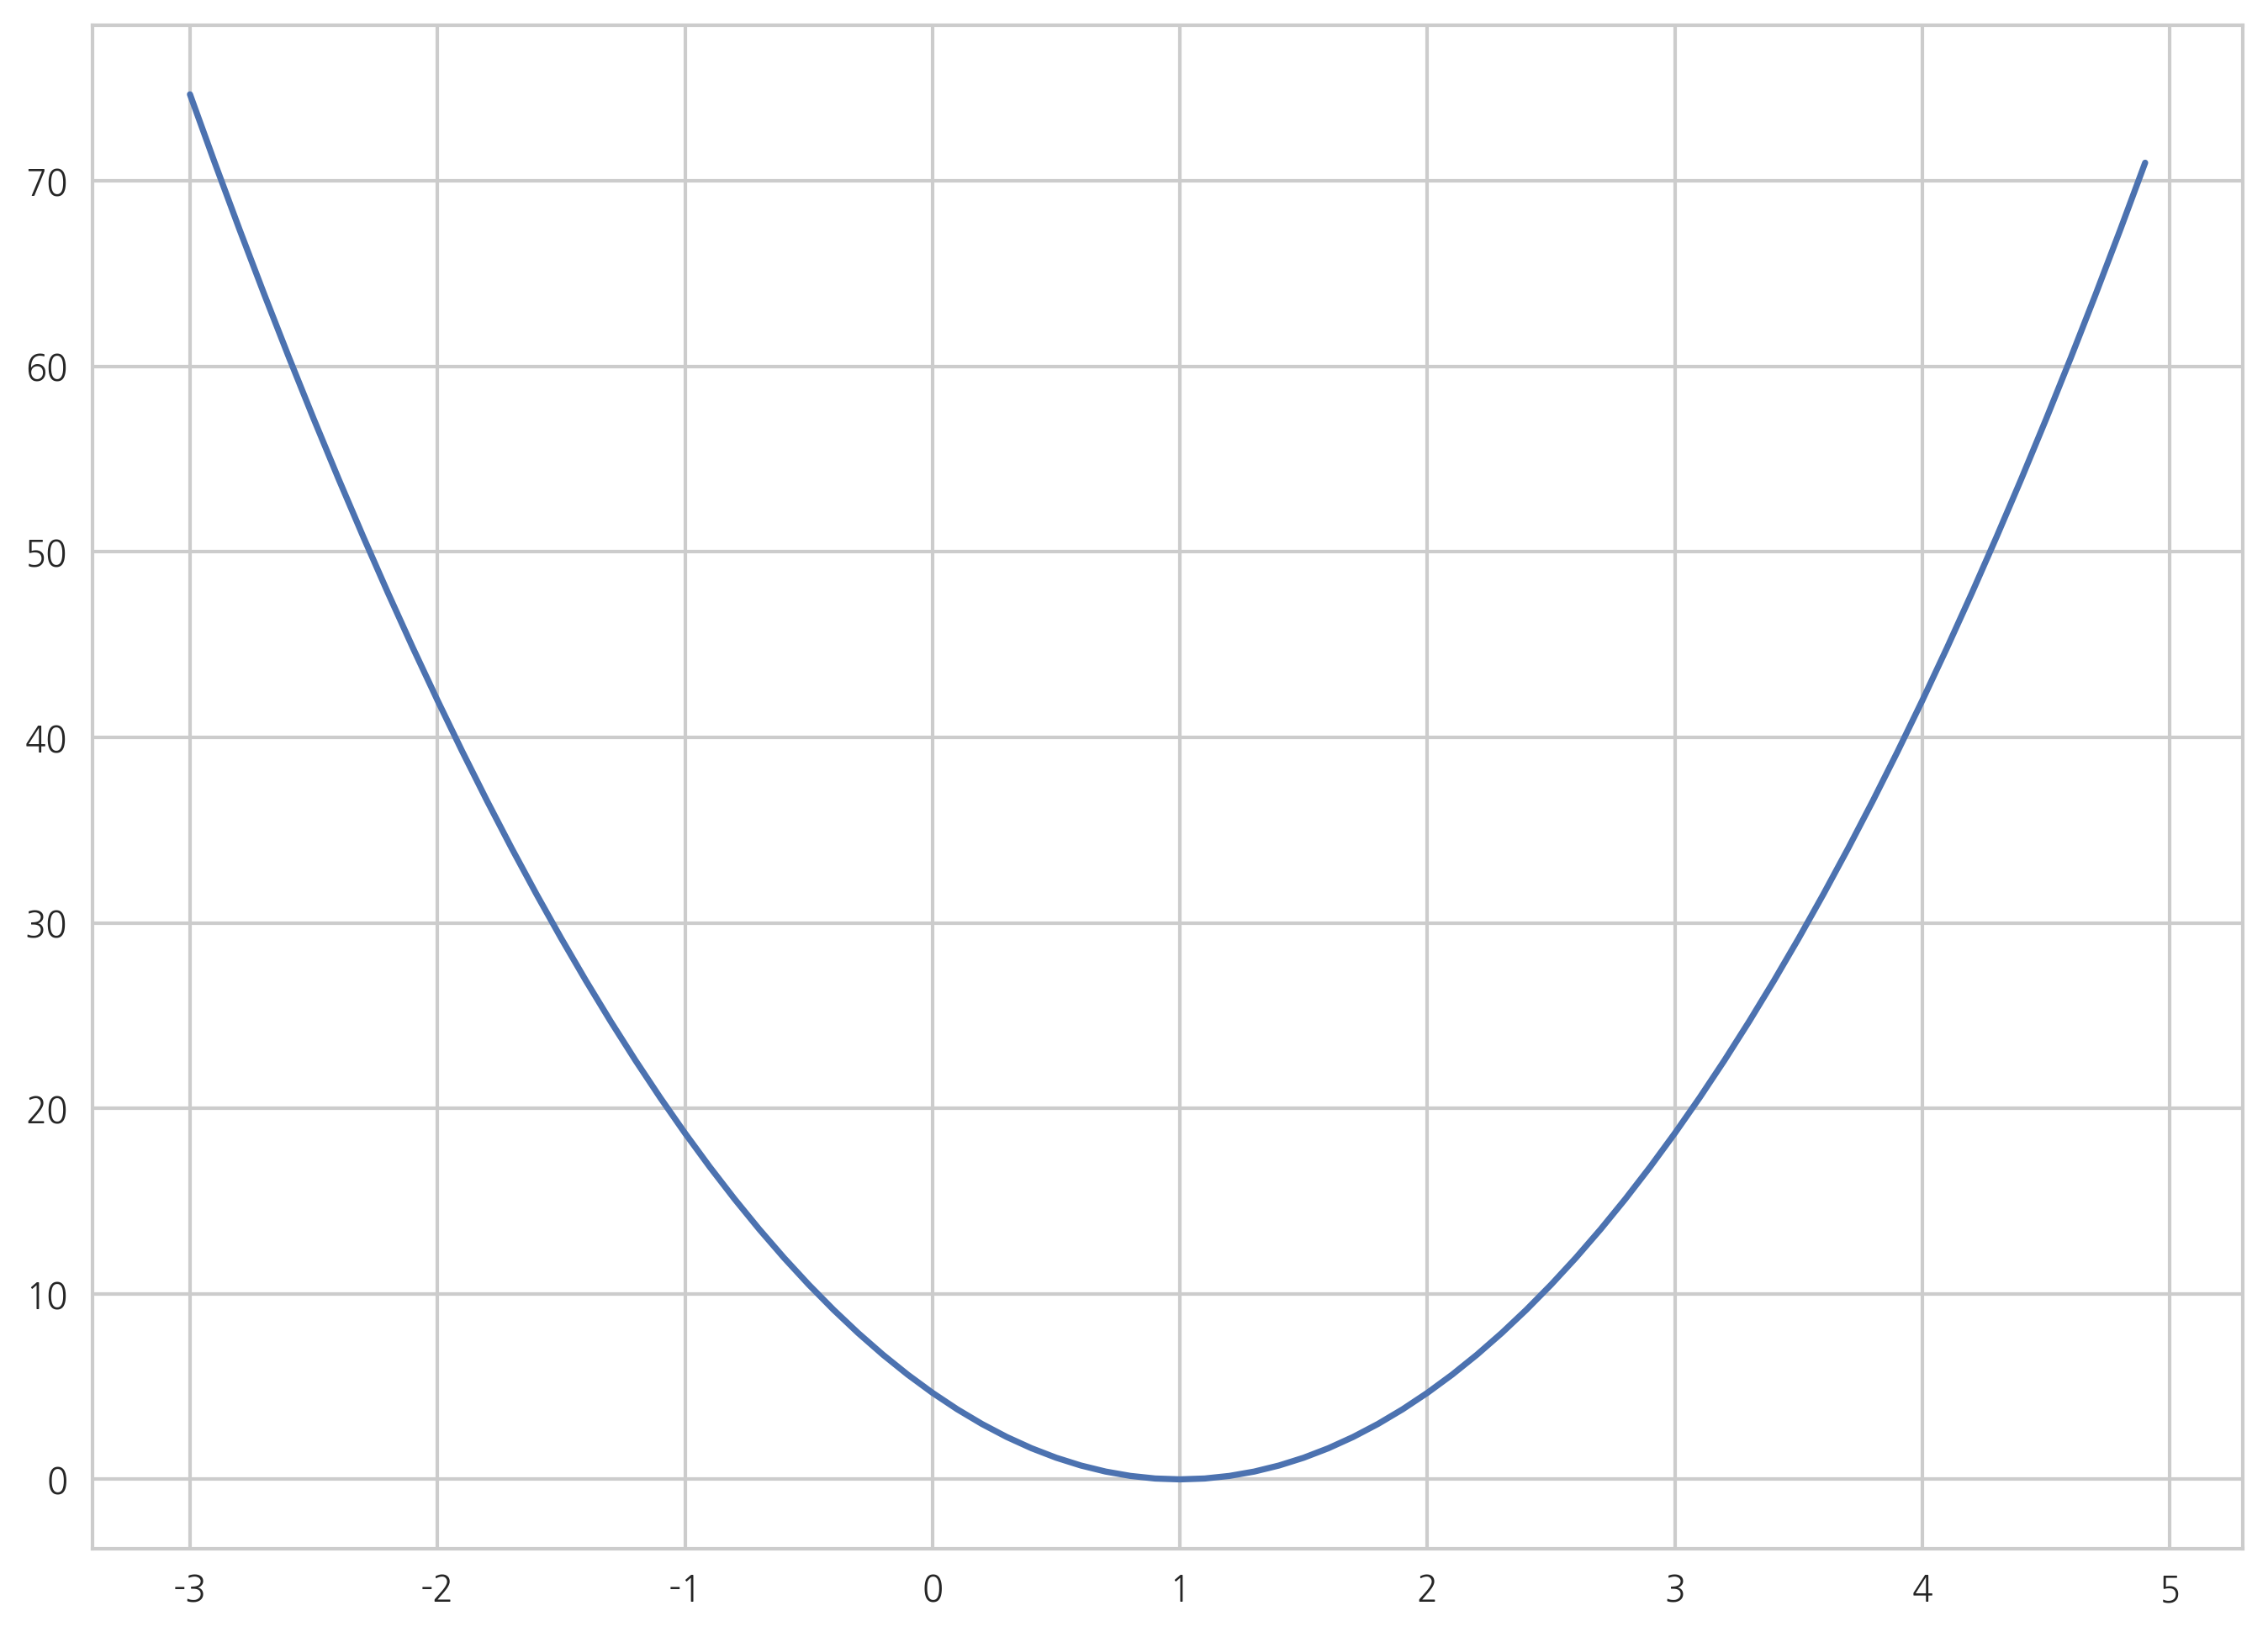

In [13]:
# Lab 3 Minimizing Cost
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Variables for plotting cost function
W_history = []
cost_history = []

for i in range(-30, 50):
    curr_W = i * 0.1
    curr_cost = sess.run(cost, feed_dict={W: curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)

# Show the cost function
plt.plot(W_history, cost_history)
plt.show()

In [15]:
# Lab 3 Minimizing Cost
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Try to find values for W and b to compute y_data = W * x_data + b
# We know that W should be 1 and b should be 0
# But let's use TensorFlow to figure it out
W = tf.Variable(tf.random_normal([1]), name='weight')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)
# assign은 w를 업데이트 시켜주는 것 

#------------------------------여기까지 그래프

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
# globa_variable은 변수를 초기화 시켜주는 것!

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    # update를 실행시키는데, x_data와 y_data를 실행시키면서!
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 7.89686 [-0.30083978]
1 2.24622 [ 0.3062188]
2 0.638924 [ 0.62998331]
3 0.181738 [ 0.80265778]
4 0.0516945 [ 0.89475083]
5 0.0147042 [ 0.94386709]
6 0.00418254 [ 0.97006243]
7 0.0011897 [ 0.98403329]
8 0.000338405 [ 0.9914844]
9 9.62568e-05 [ 0.99545836]
10 2.73793e-05 [ 0.99757779]
11 7.78865e-06 [ 0.99870813]
12 2.21509e-06 [ 0.99931103]
13 6.30178e-07 [ 0.99963254]
14 1.79238e-07 [ 0.99980402]
15 5.10315e-08 [ 0.99989545]
16 1.44874e-08 [ 0.99994427]
17 4.12473e-09 [ 0.99997026]
18 1.17687e-09 [ 0.99998415]
19 3.32292e-10 [ 0.99999154]
20 9.57622e-11 [ 0.99999547]


#### cost값이 점점 작이지고 w값이 1에 점점 같아짐

In [18]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
# 아까 위에서 learning_rate = 0.1 /gradient = tf.reduce_mean((W * X - Y) * X)
# descent = W - learning_rate * gradient / update = W.assign(descent) 등을
# 간단하게 정의해준 것

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.26667
2 1.01778
3 1.00119
4 1.00008
5 1.00001
6 1.0
7 1.0
8 1.0
9 1.0


#### - optional 강의

In [19]:
# Lab 3 Minimizing Cost
# This is optional
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

# Linear model
hypothesis = X * W

# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Get gradients
gvs = optimizer.compute_gradients(cost, [W])
# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)
    # Same as sess.run(train)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.848888, 4.6266665, [(33.848888, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228264, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.738752, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.3613949, [(12.706352, 2.3613949)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445186, 2.119127)]]
14 [9.4703016, 2.0146751, [(9.4703016, 2.0146751)]]
15 [8.5864067, 1.9199722, [(8.5864067, 1.9199722)]]
16 [7.7850089, 1.8341081, [(7.7850089, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.3996239, 1.685674, [(6.3996239, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023257, 1.62